In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

In [ ]:
df = pd.read_csv("online_sales_dataset.csv")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.480000,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.150000,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.040000,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.050000,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.160000,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low


In [ ]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [ ]:
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [ ]:
df['ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].median())

In [ ]:
df['ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].median())

In [ ]:
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode'], keep='first')

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'paypall': 'paypal'})
df['ReturnStatus'] = df['ReturnStatus'].str.title()

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['Net Revenue'] = df['Revenue'] * (1 - df['Discount'])

In [ ]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [ ]:
print(df[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Revenue', 'Net Revenue', 'PaymentMethod', 'ReturnStatus']])

       InvoiceNo StockCode  Quantity  UnitPrice  Revenue  Net Revenue  \
0         221958  SKU_1964        38       1.71    64.98      34.4394   
1         771155  SKU_1241        18      41.25   742.50     601.4250   
2         231932  SKU_1501        49      29.11  1426.39     927.1535   
3         465838  SKU_1760        14      76.68  1073.52     923.2272   
5         744167  SKU_1006        47      70.16  3297.52    1714.7104   
...          ...       ...       ...        ...      ...          ...   
49777     354083  SKU_1562        25      70.92  1773.00    1418.4000   
49778     296698  SKU_1930         7      51.74   362.18     278.8786   
49779     177622  SKU_1766        43      85.25  3665.75    2932.6000   
49780     701213  SKU_1602        48      39.64  1902.72    1312.8768   
49781     772215  SKU_1832        30      38.27  1148.10    1033.2900   

       PaymentMethod  ReturnStatus  
0      Bank Transfer  Not Returned  
1             paypal  Not Returned  
2      Bank 

Exploratory Data Analysis (EDA)

Top 10 Products by Net Revenue:
 Description
White Mug         4.190846e+06
USB Cable         4.104765e+06
Desk Lamp         4.099579e+06
Backpack          4.082019e+06
Wall Clock        4.073287e+06
Wireless Mouse    4.044009e+06
Headphones        4.040061e+06
Blue Pen          4.028690e+06
T-shirt           3.996342e+06
Office Chair      3.987498e+06
Name: Net Revenue, dtype: float64
Top 10 Products by Quantity Sold:
 Description
USB Cable         109279
Wall Clock        108922
White Mug         108415
Backpack          108300
Desk Lamp         107857
Office Chair      106794
Wireless Mouse    106159
Blue Pen          105870
T-shirt           105784
Headphones        105357
Name: Quantity, dtype: int64


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\2722823421.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='viridis')


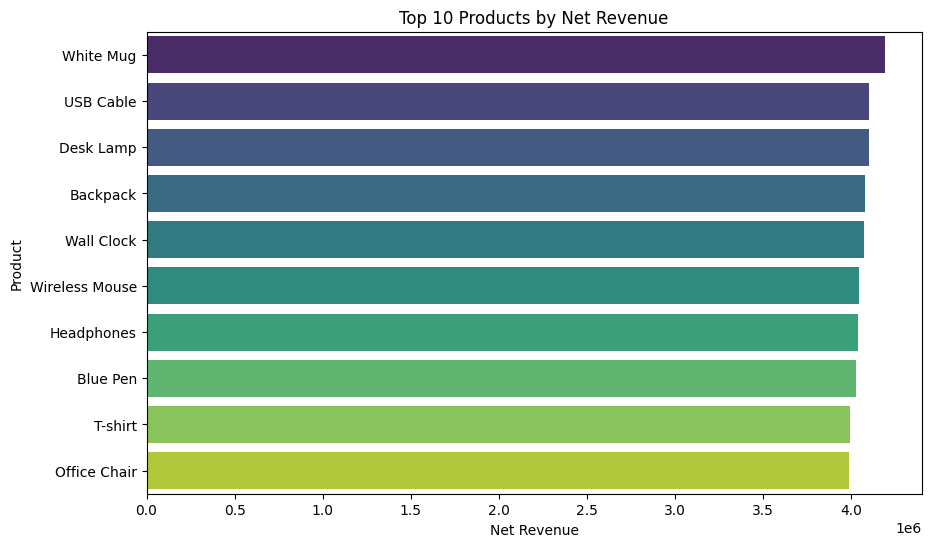

In [ ]:
# Top products by Net Revenue
top_products_revenue = df.groupby(['Description'])['Net Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Net Revenue:\n", top_products_revenue)

# Top products by Quantity sold
top_products_quantity = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:\n", top_products_quantity)

# Plotting top products by revenue
plt.figure(figsize=(10,6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='viridis')
plt.title('Top 10 Products by Net Revenue')
plt.xlabel('Net Revenue')
plt.ylabel('Product')
plt.show()


Top 10 Countries by Net Revenue:
 Country
Belgium           3.834826e+06
United Kingdom    3.796476e+06
United States     3.784707e+06
Sweden            3.772469e+06
Germany           3.752837e+06
France            3.747060e+06
Spain             3.705807e+06
Portugal          3.703388e+06
Norway            3.684369e+06
Italy             3.662176e+06
Name: Net Revenue, dtype: float64


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\2645185272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='rocket')


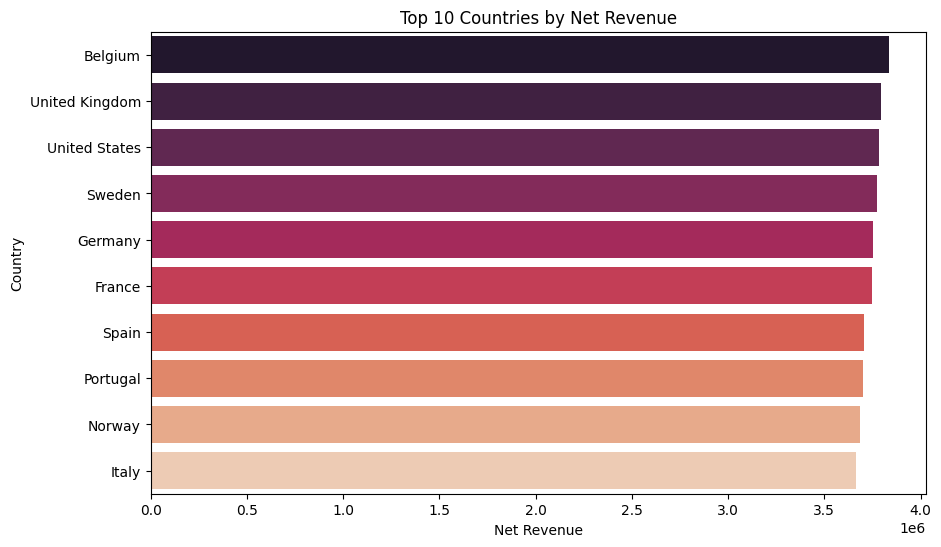

In [ ]:
# Top countries by Net Revenue
top_countries_revenue = df.groupby('Country')['Net Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Net Revenue:\n", top_countries_revenue)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='rocket')
plt.title('Top 10 Countries by Net Revenue')
plt.xlabel('Net Revenue')
plt.ylabel('Country')
plt.show()


Revenue by Sales Channel:
 SalesChannel
Online      2.237086e+07
In-store    2.226283e+07
Name: Net Revenue, dtype: float64


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\1461032759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_channel_revenue.index, y=sales_channel_revenue.values, palette='mako')


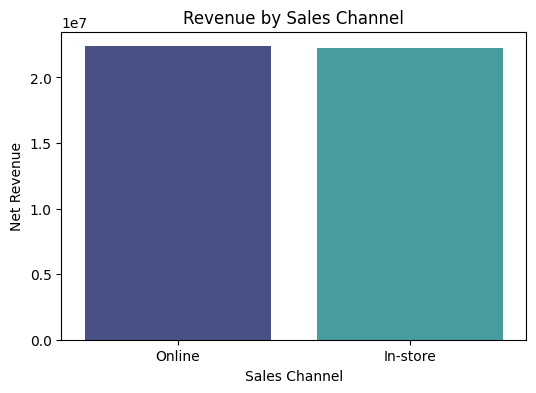

In [ ]:
# Sales Channel Revenue
sales_channel_revenue = df.groupby('SalesChannel')['Net Revenue'].sum().sort_values(ascending=False)
print("Revenue by Sales Channel:\n", sales_channel_revenue)

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=sales_channel_revenue.index, y=sales_channel_revenue.values, palette='mako')
plt.title('Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Net Revenue')
plt.show()


Detect Seasonal Trends and Anomalies

In [ ]:
#1. Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


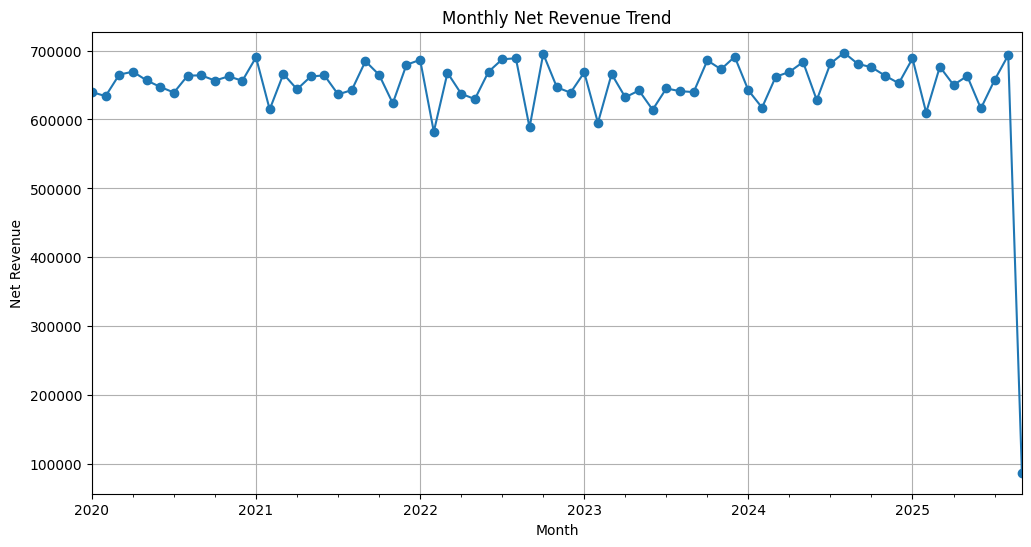

In [ ]:
#2. Monthly Sales Trend
monthly_revenue = df.groupby('InvoiceMonth')['Net Revenue'].sum()

# Plot the monthly revenue
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o')
plt.title('Monthly Net Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.grid(True)
plt.show()


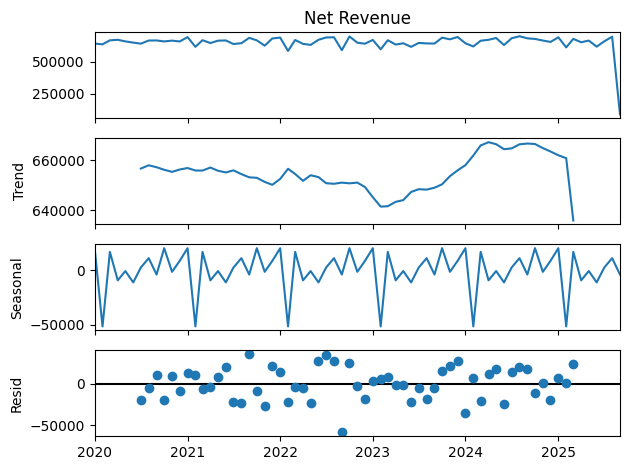

In [ ]:
#3. Seasonal Decomposition
# Convert InvoiceMonth to timestamp for seasonal decomposition
monthly_revenue_ts = monthly_revenue.to_timestamp()

# Decomposition
decomposition = seasonal_decompose(monthly_revenue_ts, model='additive', period=12)

# Plot
decomposition.plot()
plt.show()


Segment Customers Based on Purchasing Behavior

In [ ]:
#1. Create Customer-Level Metrics
#We'll use RFM (Recency, Frequency, Monetary) analysis.
import datetime as dt

# Assuming the latest date in the dataset as the reference date
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Table
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Net Revenue': 'sum'
})

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Net Revenue': 'Monetary'
}, inplace=True)

print(rfm_df.head())


            Recency  Frequency   Monetary
CustomerID                               
10001.0         742          1  1470.7334
10003.0        1842          1   365.7385
10005.0         251          2  2350.1430
10008.0         145          1    48.8280
10009.0        1826          1   463.5904


In [ ]:
#2. Standardize RFM for Clustering
# Standardize
rfm_scaled = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(zscore)

# Check
print(rfm_scaled.head())


             Recency  Frequency  Monetary
CustomerID                               
10001.0    -0.355967  -0.498781  0.253355
10003.0     1.494113  -0.498781 -0.764603
10005.0    -1.181775   1.376032  1.063497
10008.0    -1.360055  -0.498781 -1.056552
10009.0     1.467202  -0.498781 -0.674459


In [ ]:
#3. KMeans Clustering on Customers
# Build KMeans model (let's try 4 segments for now)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
})

print(cluster_summary)


             Recency Frequency     Monetary       
                mean      mean         mean  count
Cluster                                           
0         998.053872  1.000842  2406.002381   4752
1        1580.706464  1.031383   651.846915  11726
2         628.139017  2.184741  2136.625740   7589
3         503.757375  1.004593   620.337994  11322


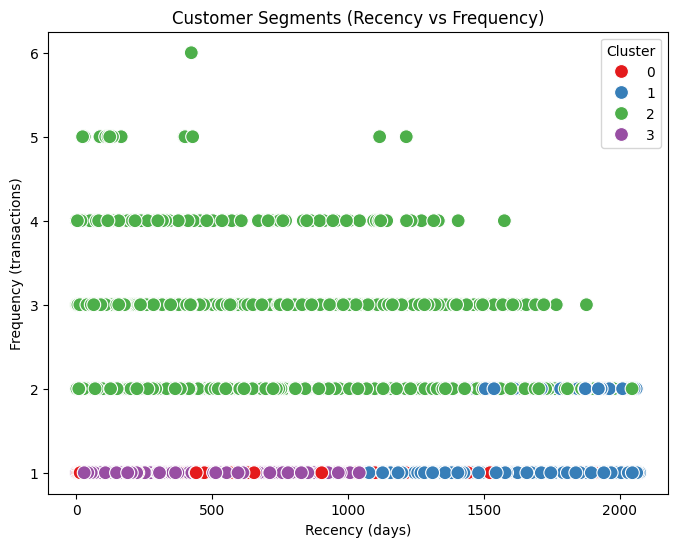

In [ ]:
#4. Plot Clusters
# 2D Plot (Recency vs Frequency)
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments (Recency vs Frequency)')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (transactions)')
plt.legend(title='Cluster')
plt.show()


3. Visualization:

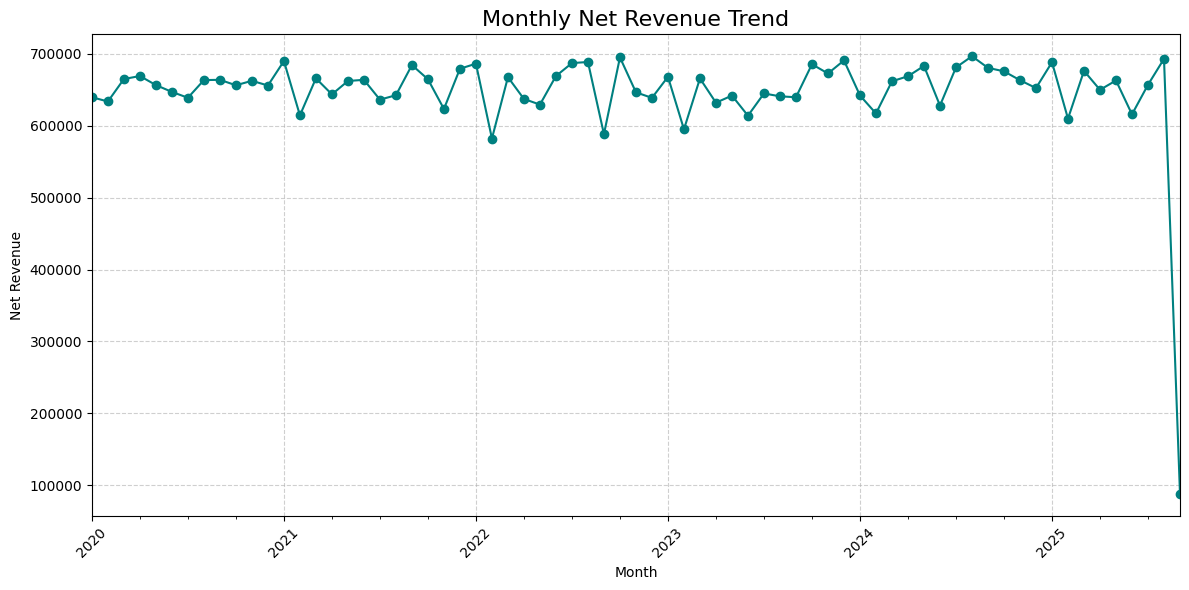

In [ ]:
#1. Sales Trend Analysis Chart
# Plot the monthly Net Revenue trend
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o', color='teal')
plt.title('Monthly Net Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


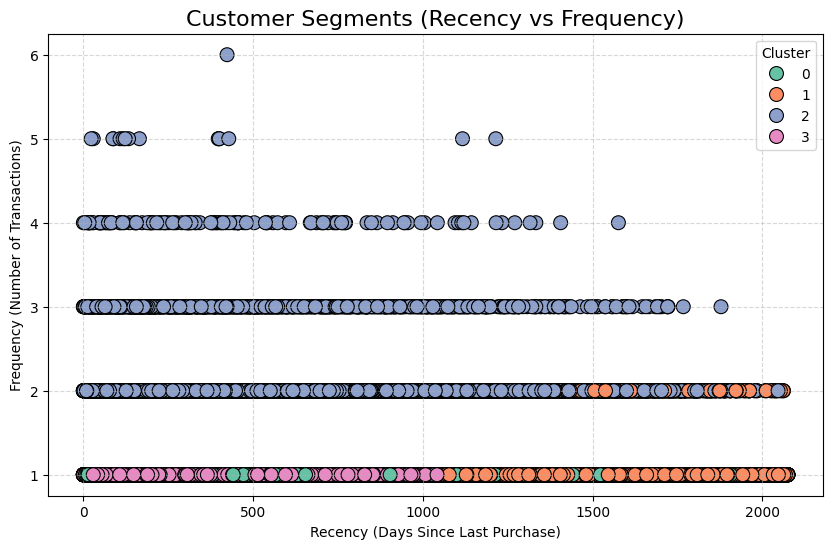

In [ ]:
#2. Customer Segmentation Visual
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm_df, 
    x='Recency', 
    y='Frequency', 
    hue='Cluster', 
    palette='Set2', 
    s=100,
    edgecolor='black'
)
plt.title('Customer Segments (Recency vs Frequency)', fontsize=16)
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Transactions)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\2394707303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


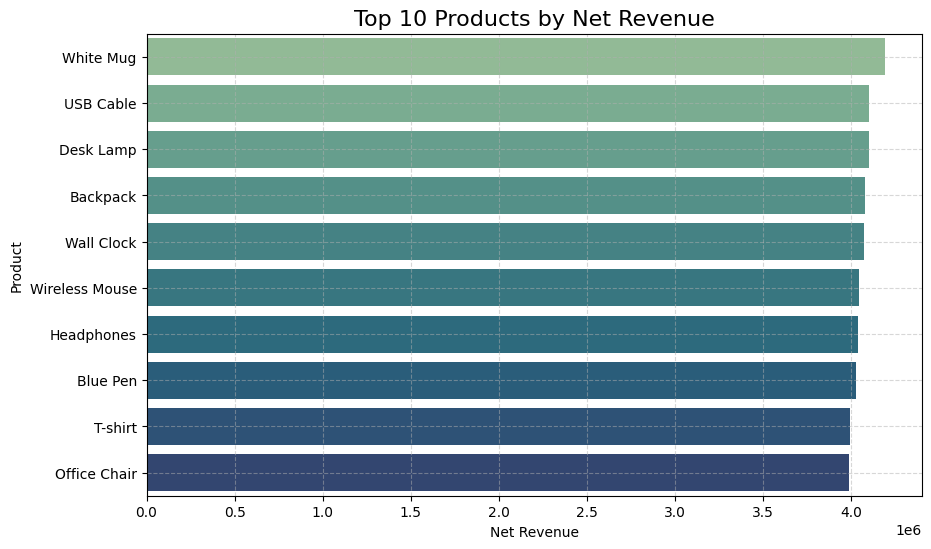

In [ ]:
#3. Top Products by Net Revenue Chart
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_products_revenue.values, 
    y=top_products_revenue.index, 
    palette='crest'
)
plt.title('Top 10 Products by Net Revenue', fontsize=16)
plt.xlabel('Net Revenue')
plt.ylabel('Product')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


4. Insights and Recommendations:

5. Sales Forecasting (Next Month's Prediction)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\4282322664.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Net Revenue'].resample('M').sum()


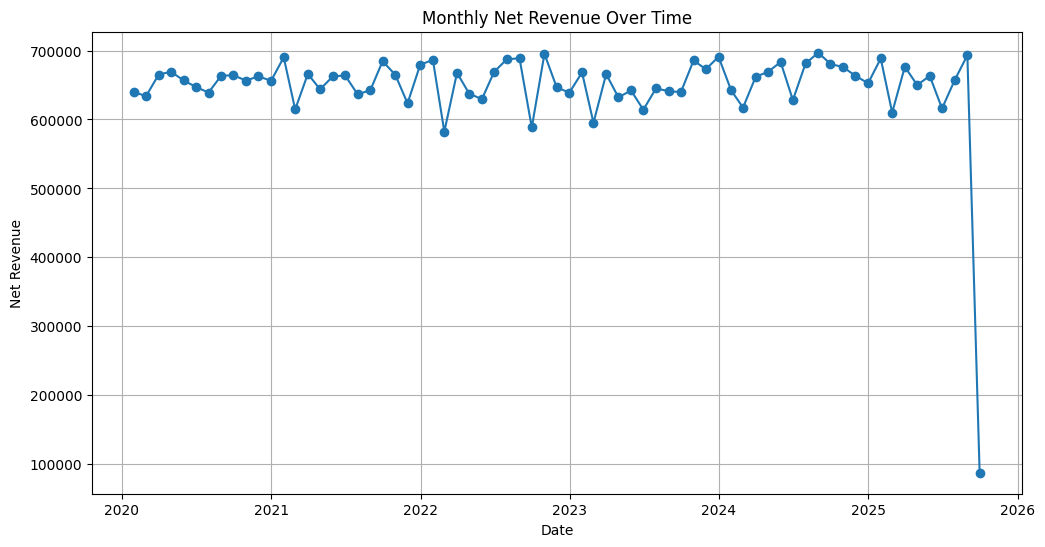

In [ ]:
#Prepare Time Series Data
# Convert InvoiceDate to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set InvoiceDate as index
df.set_index('InvoiceDate', inplace=True)

# Resample to get monthly Net Revenue
monthly_sales = df['Net Revenue'].resample('M').sum()

# Plot to visualize
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Net Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.grid(True)
plt.show()


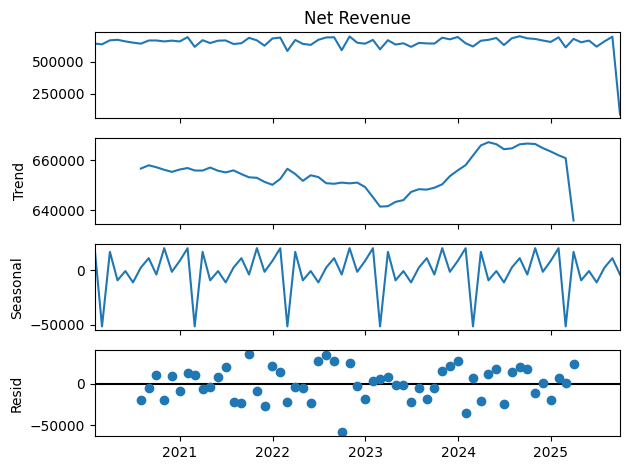

In [ ]:
#Decompose the Time Series
decompose_result = seasonal_decompose(monthly_sales, model='additive')
decompose_result.plot()
plt.show()


In [ ]:
#Build & Fit an ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (p,d,q) parameters can be tuned later
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next month's sales
forecast = model_fit.forecast(steps=1)
print("Predicted Next Month's Net Revenue: ${:.2f}".format(forecast[0]))


Predicted Next Month's Net Revenue: $198925.36


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\636754505.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted Next Month's Net Revenue: ${:.2f}".format(forecast[0]))


C:\Users\Welcome\AppData\Local\Temp\ipykernel_7024\1087141900.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:],


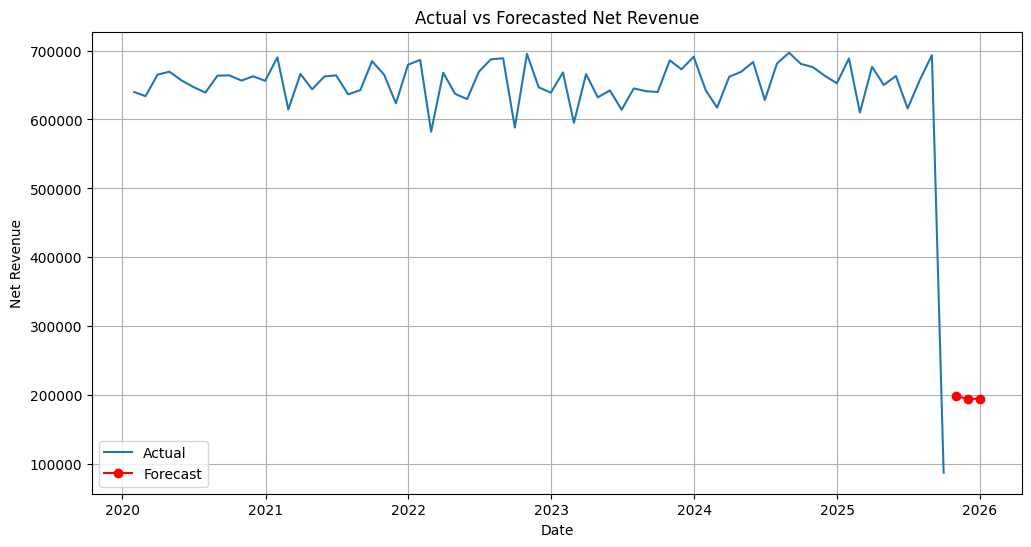

In [ ]:
#Plot Forecast vs Actual
# Forecast next 3 months
forecast_steps = 3
future_forecast = model_fit.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:], 
         future_forecast, marker='o', label='Forecast', color='red')
plt.title('Actual vs Forecasted Net Revenue')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.legend()
plt.grid(True)
plt.show()
